In [1]:
import numpy as np
import matplotlib.pyplot as plt
from procesadoDatosPrecioString import procesar_datos_string 
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import normalize
from sklearn.metrics import silhouette_score

In [2]:
datos = procesar_datos_string()
datos

Archivo donde están los datos del precio (sin extensión): precio


,00:00,01:00,02:00,03:00,04:00,05:00,06:00,07:00,08:00,09:00,...,14:00,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00
20170101,132.63,135.59,129.90,125.38,123.84,122.72,122.60,122.55,119.35,116.78,...,120.95,120.15,120.83,127.76,134.42,135.79,137.63,132.23,129.79,121.53
20170102,128.92,123.87,120.91,119.43,118.55,120.34,124.24,130.16,133.22,131.35,...,128.04,127.02,127.31,136.53,140.28,141.97,138.66,134.19,130.78,129.82
20170103,126.81,124.39,120.24,115.85,116.10,120.33,129.89,141.30,139.10,139.06,...,138.93,138.66,138.89,139.75,141.50,142.64,145.28,142.51,142.26,139.56
20170104,136.96,129.05,126.49,124.19,122.97,124.63,135.63,145.85,143.32,144.58,...,137.84,135.87,136.71,141.10,144.29,145.16,145.13,140.49,137.25,134.17
20170105,123.83,121.60,122.75,120.03,113.54,115.70,125.36,136.40,137.20,138.79,...,139.61,139.33,137.68,141.74,142.33,143.88,142.67,142.33,138.63,142.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20191227,90.86,88.50,83.36,82.35,78.64,82.90,87.77,93.20,97.07,99.13,...,94.15,91.62,95.92,101.56,107.16,106.26,101.26,98.59,96.92,95.65
20191228,93.63,93.48,88.48,85.65,83.10,84.19,84.21,86.01,88.76,97.19,...,90.65,86.48,92.92,100.95,105.82,105.30,101.23,96.63,97.22,91.98
20191229,94.88,92.36,90.90,86.37,84.35,85.05,86.04,88.51,90.04,93.09,...,91.40,92.45,95.46,103.83,105.84,105.72,101.66,103.12,101.81,97.65
20191230,96.99,88.24,85.59,85.14,84.54,85.05,94.41,104.09,105.27,105.25,...,94.65,94.60,97.94,106.06,109.18,110.88,110.83,109.95,105.32,103.42


In [3]:
datos = datos.T
labels = list(datos.index)

In [4]:
datos = datos.to_numpy()

In [5]:
datos = normalize(datos)

In [7]:
len(datos[0])

1095

In [11]:
score_list = []
maximo = (0,0)
for x in range(2,23):
    clusterer = KMeans(n_clusters=x, random_state=1)
    cluster_labels = clusterer.fit_predict(datos)
    score = silhouette_score(datos, cluster_labels)
    score_list.append(score)
    if score > maximo[1]:
        maximo = (x, score)

El maximo se obtiene en el nodo 2 con una puntuacion de 0.42143692700070673


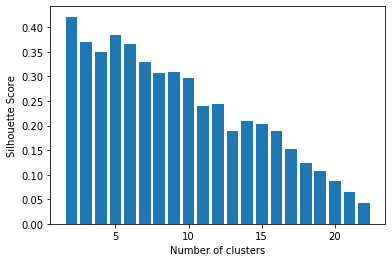

In [14]:
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.bar([i for i in range(2,23)], score_list)
print("El maximo se obtiene en el nodo {} con una puntuacion de {}".format(maximo[0], maximo[1]))